In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from deepNN import DNN

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
X = df.iloc[:, 1:-1].to_numpy()
Y = df.iloc[:, -1].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.05, random_state=42)
y_train = y_train.reshape(1, -1)
y_test = y_test.reshape(1, -1)

X_train = (X_train - np.mean(X_train, axis=1, keepdims=True)) / np.std(X_train, axis=1, keepdims=True)
X_test = (X_test - np.mean(X_test, axis = 1, keepdims=True)) / np.std(X_test, axis=1, keepdims=True)

X_train, X_test = X_train.T, X_test.T
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((29, 270566), (1, 270566), (29, 14241), (1, 14241))

In [4]:
layer_dims = [X_train.shape[0], 32, 8, 4, y_train.shape[0]]

('Layer 1 W shape : (32, 29)', 'b shape : (32, 1)')
('Layer 2 W shape : (8, 32)', 'b shape : (8, 1)')
('Layer 3 W shape : (4, 8)', 'b shape : (4, 1)')
('Layer 4 W shape : (1, 4)', 'b shape : (1, 1)')
Cost after iteration0: 0.028813451091684483
Cost after iteration10: 0.0020653409879976005
Cost after iteration20: 0.0014034172950900385
Cost after iteration30: 0.0015069413882866079
Cost after iteration40: 0.0012274784106173146
Cost after iteration50: 0.0014133256338250996
Cost after iteration60: 0.0012432525904629294
Cost after iteration70: 0.0012486048781293942
Cost after iteration80: 0.0010882196623736916
Cost after iteration90: 0.001287440195153181
Cost after iteration100: 0.001104908899076076
Cost after iteration110: 0.0009611616259925496
Cost after iteration120: 0.0010780894140363702
Cost after iteration130: 0.0010764973994615969
Cost after iteration140: 0.0008535517440915057
Cost after iteration150: 0.0008660966196364881
Cost after iteration160: 0.000911827123183454
Cost after itera

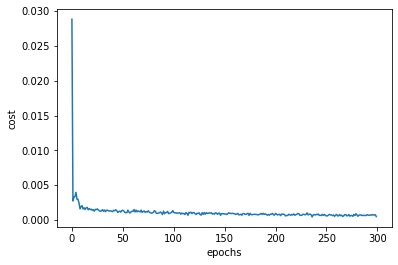

In [5]:
model1 = DNN(layer_dims, lRate=0.45, momentum=0.9, n_iters=300, GD_type='MiniBatchGD', regularizer='L2', regularizer_const=0.7)
costs_1 = model1.fit(X_train, y_train, print_cost=True)
print(f"Train accuracy: {model1.accuracy(X_train, y_train)}")
print(f"Train accuracy: {model1.accuracy(X_test, y_test)}")
plt.plot(np.squeeze(costs_1))
plt.ylabel('cost')
plt.xlabel('epochs')
plt.show()


('Layer 1 W shape : (32, 29)', 'b shape : (32, 1)')
('Layer 2 W shape : (8, 32)', 'b shape : (8, 1)')
('Layer 3 W shape : (4, 8)', 'b shape : (4, 1)')
('Layer 4 W shape : (1, 4)', 'b shape : (1, 1)')
Cost after iteration0: 0.6999925508646456
Cost after iteration100: 0.012185381987212673
Cost after iteration200: 0.010266240807347024
Cost after iteration300: 0.009314448232563131
Cost after iteration400: 0.00870293786580598
Cost after iteration500: 0.008248455813898822
Cost after iteration600: 0.007865881947976296
Cost after iteration700: 0.007542870549792359
Train accuracy: 0.9982592047781318
Train accuracy: 0.9985253844533389


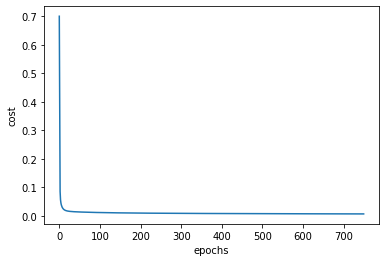

In [6]:
model2 = DNN(layer_dims, lRate=0.45, n_iters=750, activation='ReLu', initializer='He', optimizer='BatchGD')
costs_2 = model2.fit(X_train, y_train, print_cost=True)
print(f"Train accuracy: {model2.accuracy(X_train, y_train)}")
print(f"Train accuracy: {model2.accuracy(X_test, y_test)}")
plt.plot(np.squeeze(costs_2))
plt.ylabel('cost')
plt.xlabel('epochs')
plt.show()